In [149]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
import OMRobjects as OMR
import imp
imp.reload(OMR)

%matplotlib inline

In [150]:
sheet_path = './data'
sheets = [OMR.Sheet(os.path.join(sheet_path, page_path), order=i) for i, page_path in enumerate(sorted(os.listdir(sheet_path)))]

* Sheet Object Created :: Sheet #0 :: ./data/WechatIMG787.png :: (1822, 1640)


>>> Preprocessing Page #00 :: ./data/WechatIMG787.png
* Deskewing :: PASS
* Resizing :: PASS
* Denoising :: PASS
* Inverse binary thresholding :: threshold=200


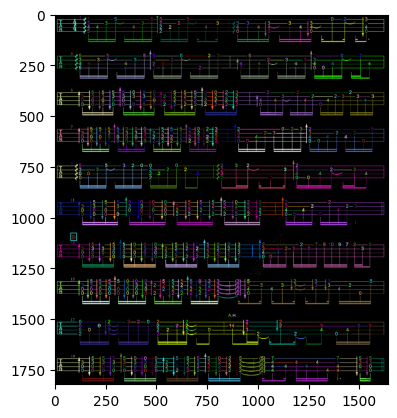

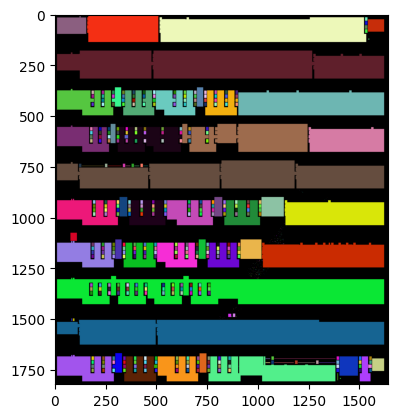

>>> Extracting systems : [[ 158    0  351  138]
 [ 515   16 1018  122]
 [  10  180 1611  138]
 [  10  369  277  130]
 [ 336  376  153  123]
 [ 497  376  194  123]
 [ 740  376  162  123]
 [ 903  376  718  123]
 [  10  549  256  130]
 [ 309  556  317  123]
 [ 627  541  621  138]
 [1248  557  373  122]
 [  10  721 1611  138]
 [  10  910  300  130]
 [ 366  917  178  123]
 [ 552  917  226  123]
 [ 834  917  176  123]
 [1131  917  490  123]
 [  10 1118  280  130]
 [ 338 1126  158  122]
 [ 503 1126  197  122]
 [ 752 1126  155  122]
 [1019 1126  602  122]
 [  10 1290 1611  139]
 [  10 1506 1611  122]
 [  10 1679  280  130]
 [ 341 1686  157  123]
 [ 506 1686  199  123]
 [ 756 1686  625  123]
 [1080 1696  301    2]
 [1501 1686   53  123]]
>>> Extracting systems : 31 systems
* System Object Created :: System #0 of [...IMG787.png] :: (x, y, w, h) = (158, 0, 351, 138)
* System Object Created :: System #1 of [...IMG787.png] :: (x, y, w, h) = (515, 16, 1018, 122)
* System Object Created :: System #2 

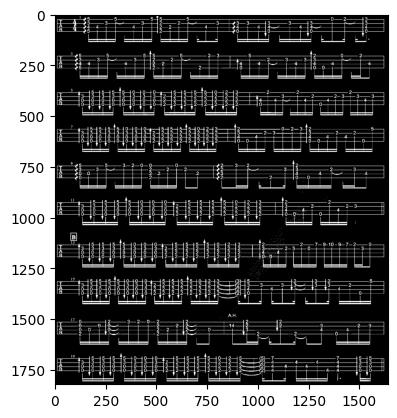

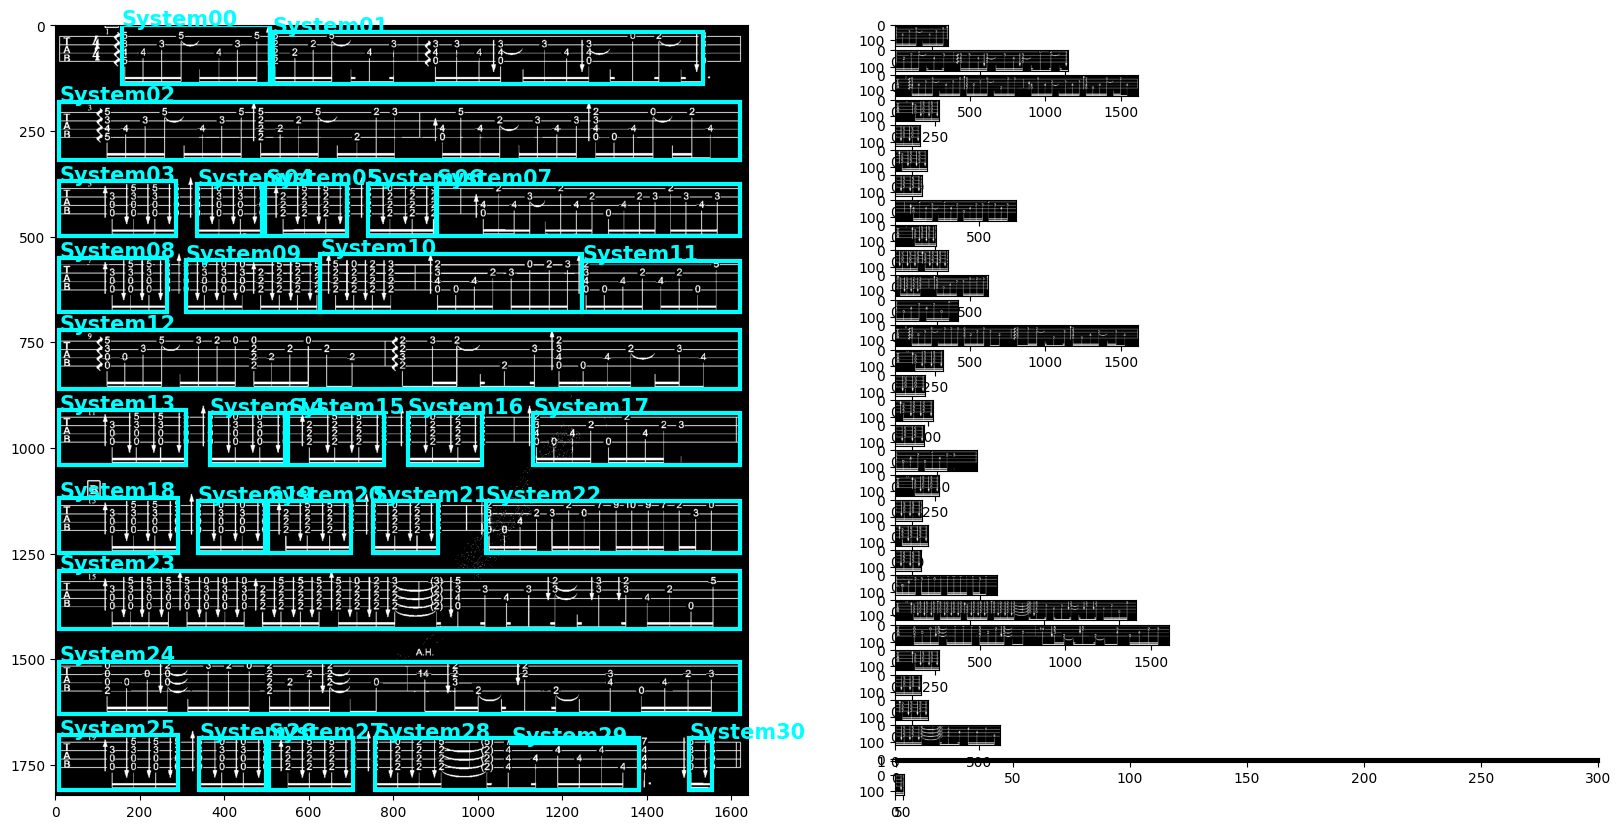

In [151]:
sample_idx = 0
sheets[sample_idx].preprocess_image(threshold=200)
sys_pos = sheets[sample_idx].create_system(sheets[sample_idx])
plt.imshow(sheets[sample_idx].image, cmap='gray')
fig = plt.figure(figsize=(20,10))
axl = plt.subplot2grid((sheets[sample_idx].num_systems, 2), (0, 0), rowspan=sheets[sample_idx].num_systems)
axl.imshow(sheets[sample_idx].image, cmap='gray')

for i, system in enumerate(sheets[sample_idx].systems):
    x, y, w, h = system.basis
    axl.add_patch(patches.Rectangle((x, y), w, h, edgecolor='cyan', fill=False, linewidth=3))
    axl.text(x, y, f'System{i:02d}', color='cyan', fontsize=15, fontweight='bold')
    
    axr = plt.subplot2grid((sheets[sample_idx].num_systems, 2), (i, 1))
    axr.imshow(system.image, cmap='gray')
    axr.set_anchor('W')
fig.set_tight_layout(True)
plt.show()

In [152]:
systems = sheets[sample_idx].systems
sample_idx = 0

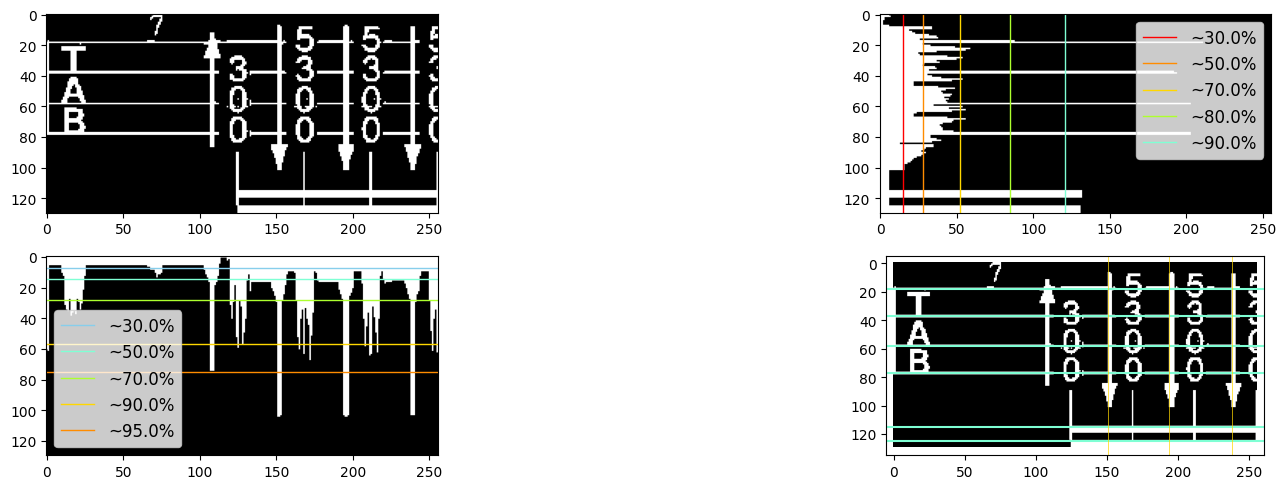

In [154]:
sample_idx = 8
line_opt = ['red', 'darkorange', 'gold', 'greenyellow', 'aquamarine', 'skyblue']

fig = plt.figure(figsize=(20,5))
ax = plt.subplot2grid((2, 2), (0, 0))
ax.imshow(systems[sample_idx].image, cmap='gray')

axVis = plt.subplot2grid((2, 2), (1, 1))
axVis.imshow(systems[sample_idx].image, cmap='gray')

axr = plt.subplot2grid((2, 2), (0, 1))
histogram, grid, grid_idx = systems[sample_idx].get_pixel_histogram(depend_on='row')
axr.imshow(histogram, cmap='gray')

for i, x in enumerate(grid_idx):
    axr.axvline(x=x, color=line_opt[i], label=f'~{100*grid[i]:.1f}%', linewidth=1)
axr.legend(fontsize='large')

hline_pos, hthickness = systems[sample_idx].get_line_info(hist_by='row')
for y, t in zip(hline_pos, hthickness):
    axVis.axhline(y=y, color=line_opt[i])


axc = plt.subplot2grid((2, 2), (1, 0))
histogram, grid, grid_idx = systems[sample_idx].get_pixel_histogram(depend_on='col', grid=[0.3, 0.5, 0.7, 0.9, 0.95])
axc.imshow(histogram, cmap='gray')

for i, y in enumerate(grid_idx):
    axc.axhline(y=y, color=line_opt[-(i+1)], label=f'~{100*grid[i]:.1f}%', linewidth=1)
axc.legend(fontsize='large')

vline_pos, vthickness = systems[sample_idx].get_line_info(hist_by='col')
for x, t in zip(vline_pos, vthickness):
    axVis.axvline(x=x, color=line_opt[-i], linewidth=0.5)
    
vline_pos, vthickness = systems[sample_idx].check_bar()
for x, t in zip(vline_pos, vthickness):
    axVis.axvline(x=x, color=line_opt[-(i+1)], linestyle='--', linewidth=2)
    
axVis.set_ylim([-5, systems[sample_idx].shape[0]+5]); axVis.invert_yaxis()
axVis.set_xlim([-5, systems[sample_idx].shape[1]+5])

fig.set_tight_layout(True)
plt.show()

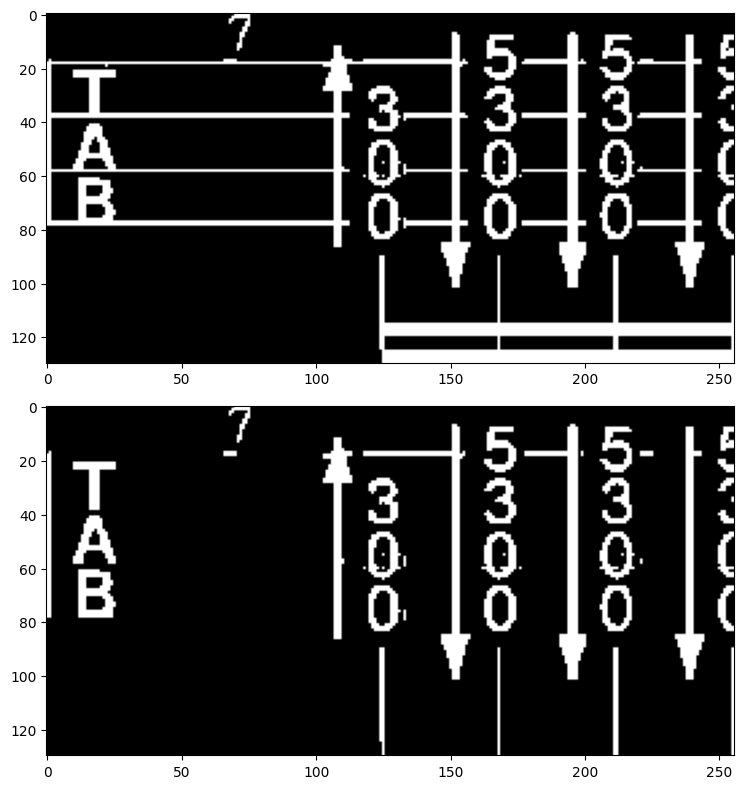

In [155]:
sample_idx = 8
fig = plt.figure(figsize=(15,8))
axt = plt.subplot2grid((2, 1), (0, 0))
axt.imshow(systems[sample_idx].image, cmap='gray')

systems[sample_idx].reset_line_removed_image()
systems[sample_idx].remove_lines(hline_pos, hthickness, direction='hor')
systems[sample_idx].remove_lines(vline_pos, vthickness, direction='ver')

axb = plt.subplot2grid((2, 1), (1, 0))
axb.imshow(systems[sample_idx].image_line_removed, cmap='gray')

fig.set_tight_layout(True)
plt.show()

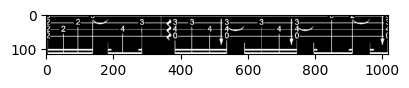

In [28]:
measures = systems[sample_idx].split_into_measures()
    
fig = plt.figure(figsize=(15,8))
for i, m in enumerate(measures):
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(m, cmap='gray')


In [22]:
systems[sample_idx].create_staff_info()
print(len(systems[sample_idx].staves))

for st in systems[sample_idx].staves:
    print('-=-=-=-=-=-=-')
    print(st.pos)
    print(st.thickness)
    print(st.num_line)
    print(st.staff_type)

AttributeError: 'System' object has no attribute 'create_staff_info'